/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


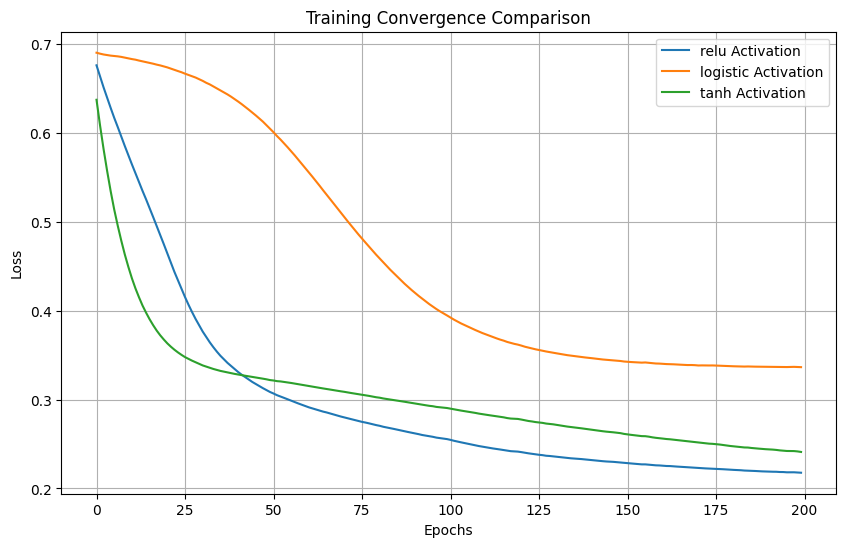

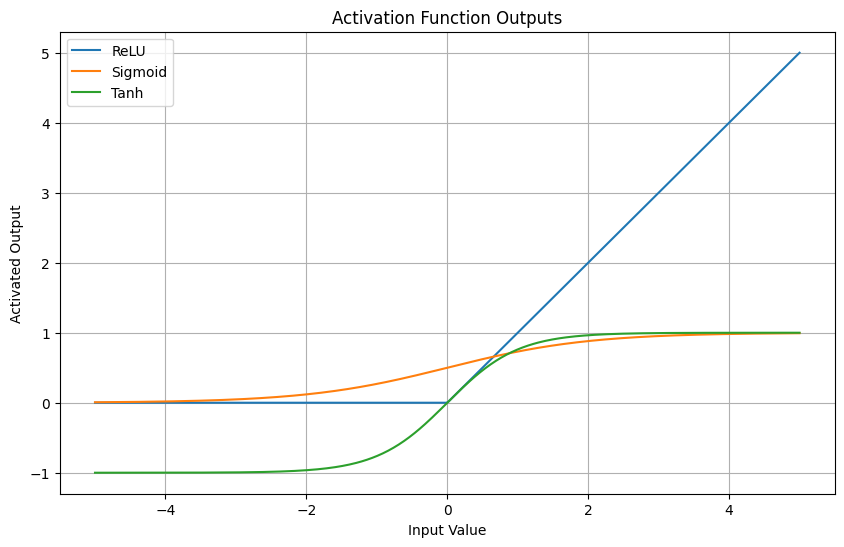

Model Accuracies:
ReLU Accuracy: 0.875
Sigmoid Accuracy: 0.85
Tanh Accuracy: 0.88125


In [1]:
# -----------------------------------------------------------
# PRACTICAL: Compare ReLU, Sigmoid, and Tanh on Same Dataset
# -----------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# -----------------------------------------------------------
# 1. Dataset Creation
# -----------------------------------------------------------
X, y = make_classification(n_samples=800, n_features=2,
                           n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# -----------------------------------------------------------
# 2. Train MLP Models with Different Activations
# -----------------------------------------------------------
activations = ["relu", "logistic", "tanh"]
models = {}
loss_curves = {}

for act in activations:
    model = MLPClassifier(hidden_layer_sizes=(16, 16),
                          activation=act,
                          max_iter=200,
                          random_state=42)
    model.fit(X_train, y_train)
    models[act] = model
    loss_curves[act] = model.loss_curve_

# -----------------------------------------------------------
# 3. Plot Loss Convergence Curves
# -----------------------------------------------------------
plt.figure(figsize=(10, 6))
for act in activations:
    plt.plot(loss_curves[act], label=f"{act} Activation")
plt.title("Training Convergence Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------------------------------------
# 4. Visualize Activation Outputs on Input Range
# -----------------------------------------------------------
x = np.linspace(-5, 5, 400)

relu = np.maximum(0, x)
sigmoid = 1 / (1 + np.exp(-x))
tanh = np.tanh(x)

plt.figure(figsize=(10, 6))
plt.plot(x, relu, label="ReLU")
plt.plot(x, sigmoid, label="Sigmoid")
plt.plot(x, tanh, label="Tanh")
plt.title("Activation Function Outputs")
plt.xlabel("Input Value")
plt.ylabel("Activated Output")
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------------------------------------
# 5. Accuracy Printing
# -----------------------------------------------------------
print("Model Accuracies:")
print("ReLU Accuracy:", models["relu"].score(X_test, y_test))
print("Sigmoid Accuracy:", models["logistic"].score(X_test, y_test))
print("Tanh Accuracy:", models["tanh"].score(X_test, y_test))
